# Studying phase transitions using dimensional reduction

This code relies on work from Lauren Hayward, Juan Carrasquilla, and Mohamed Hibat Allah. <br>
Reference: https://arxiv.org/abs/1606.00318

The objective of this homework assignment is to use the dimensional reduction techniques to identify phases without knowledge of phase labels. Dimensional reduction methods aim to generate a lower-dimensional representation $\mathcal{D}′ = \{x′\}$ of a high-dimensional dataset $\mathcal{D} = \{x\}$, where $x′ \in \mathbb{R}^{N′}$, $x \in \mathbb{R}^{N}$ and $N′ < N$. The lower-dimensional dataset should still encode the important features of the original higher-dimensional data.

### Import libraries

In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython import display
import numpy.linalg as la

import warnings
warnings.filterwarnings("ignore")

### Load data

($x$ is used to refer to the spin configurations).

In [2]:
github_dir = 'https://raw.githubusercontent.com/sofiagonga/ML_manybody_physics/main/dimensional_reduction_phase_transitions/data'

#Ising model
x_ising_20_url = os.path.join(github_dir, 'spinConfigs_Ising_L20.txt') #configurations
x_ising_40_url = os.path.join(github_dir, 'spinConfigs_Ising_L40.txt') #configurations
x_ising_80_url = os.path.join(github_dir, 'spinConfigs_Ising_L80.txt') #configurations

x_ising_20 = np.loadtxt(x_ising_20_url , dtype='int16')
x_ising_40 = np.loadtxt(x_ising_40_url , dtype='int16')
x_ising_80 = np.loadtxt(x_ising_80_url , dtype='int16')

T_ising_20_url = os.path.join(github_dir, 'temperatures_Ising_L20.txt') #configurations
T_ising_40_url = os.path.join(github_dir, 'temperatures_Ising_L40.txt') #configurations
T_ising_80_url = os.path.join(github_dir, 'temperatures_Ising_L80.txt') #configurations

T_ising_20 = np.loadtxt(T_ising_20_url , dtype='double')
T_ising_40 = np.loadtxt(T_ising_40_url , dtype='double')
T_ising_80 = np.loadtxt(T_ising_80_url , dtype='double')

#Gauge theory model
x_gauge_20_url = os.path.join(github_dir, 'spinConfigs_gaugeTheory_L20.txt') #configurations
x_gauge_40_url = os.path.join(github_dir, 'spinConfigs_gaugeTheory_L40.txt') #configurations
x_gauge_80_url = os.path.join(github_dir, 'spinConfigs_gaugeTheory_L80.txt') #configurations

x_gauge_20 = np.loadtxt(x_gauge_20_url , dtype='int16')
x_gauge_40 = np.loadtxt(x_gauge_40_url , dtype='int16')
x_gauge_80 = np.loadtxt(x_gauge_80_url , dtype='int16')

y_gauge_20_url = os.path.join(github_dir, 'labels_gaugeTheory_L20.txt') #labels
y_gauge_40_url = os.path.join(github_dir, 'labels_gaugeTheory_L40.txt') #labels
y_gauge_80_url = os.path.join(github_dir, 'labels_gaugeTheory_L80.txt') #labels

y_gauge_20 = np.loadtxt(y_gauge_20_url , dtype='int16')
y_gauge_40 = np.loadtxt(y_gauge_40_url , dtype='int16')
y_gauge_80 = np.loadtxt(y_gauge_80_url , dtype='int16')

Store system sizes and print as check:

In [6]:
n_configs_ising_20 = x_ising_20.shape[0]
n_spins_ising_20 = x_ising_20.shape[1]
L_ising_20 = int(np.sqrt(n_spins_ising_20))

n_configs_ising_40 = x_ising_40.shape[0]
n_spins_ising_40 = x_ising_40.shape[1]
L_ising_40 = int(np.sqrt(n_spins_ising_40))

n_configs_ising_80 = x_ising_80.shape[0]
n_spins_ising_80 = x_ising_80.shape[1]
L_ising_80 = int(np.sqrt(n_spins_ising_80))

print("Ising model system sizes: ", L_ising_20, L_ising_40, L_ising_80)

Ising model system sizes:  20 40 80


In [5]:
n_configs_gauge_20 = x_gauge_20.shape[0]
n_spins_gauge_20 = x_gauge_20.shape[1]
L_gauge_20 = int(np.sqrt(n_spins_gauge_20/2))

n_configs_gauge_40 = x_gauge_40.shape[0]
n_spins_gauge_40 = x_gauge_40.shape[1]
L_gauge_40 = int(np.sqrt(n_spins_gauge_40/2))

n_configs_gauge_80 = x_gauge_80.shape[0]
n_spins_gauge_80 = x_gauge_80.shape[1]
L_gauge_80 = int(np.sqrt(n_spins_gauge_80/2))

print("Ising model system sizes: ", L_gauge_20, L_gauge_40, L_gauge_80)

Ising model system sizes:  20 40 80


## 1. Principal component analysis (PCA)

The principal component analysis (PCA) method performs dimensional reduction by applying a linear transformation. In this problem you we apply PCA to $N$-dimensional spin configurations of the two- dimensional Ising model and Ising gauge theory.

### 1.a) Obtaining the principal components

PCA can be performed on a matrix $X_C$ where each column has mean 0. One can calculate $X_C$ from $x$ as: $X_{ij}^C = X_{ij} - \frac{1}{M}\sum_{k=1}^M X_{kj}$. The principal components $x′_1, x′_2,...$ are then stored in the columns of an $M \times N$ matrix: $X' = X_C P$. $P$ is determined by solving the eigenvalue problem: $\frac{1}{M-1}X_C^TX_C = P^T D P$ where $D$ is a diagonal matrix with non-negative entries $\lambda_1 \geq \lambda_2 \geq  ... \geq  \lambda_N \geq  0$.

In [16]:
def X_c(x, M):
    X_c = x - (1/M)*np.outer(np.ones(M).T, np.sum(x, axis=0))
    return X_c

def X_prime(X_c):
    lambdas, P = la.eig(np.dot(X_c.T, X_c))
    X_prime = np.dot(X_c, P)
    return X_prime

In [20]:
Xc_20 = X_c(x = x_ising_20, M = n_configs_ising_20)
Xc_40 = X_c(x = x_ising_40, M = n_configs_ising_40)
Xc_80 = X_c(x = x_ising_80, M = n_configs_ising_80)

X_prime_20 = X_prime(Xc_20)
X_prime_40 = X_prime(Xc_40)
X_prime_80 = X_prime(Xc_80)

In [78]:
def plot_pca_scatter(X_prime, sys_size, columns = [0,1]):
    plt.title('Ising model PCA (L = ' + str(sys_size) + ')')
    plt.scatter(X_prime[:,columns[0]], X_prime[:,columns[1]], s = 1, c = "#458B74")
    plt.xlabel(r'$x$' + str(columns[0]+1))
    plt.ylabel(r'$x$' + str(columns[1]+1))
    plt.show()

def plot_pca_scatter_with_T(X_prime, temperatures, sys_size, columns = [0,1]):
    plt.title('Ising model PCA with temperature (L = ' + str(sys_size) + ')')
    plt.scatter(X_prime[:,columns[0]], X_prime[:,columns[1]], s = 3, c = temperatures, cmap = 'YlOrRd')
    plt.xlabel(r'$x$' + str(columns[0]+1))
    plt.ylabel(r'$x$' + str(columns[1]+1))
    plt.colorbar(label="Temperature", orientation="vertical")
    plt.figure(figsize=(15, 6))
    plt.show()

Project the samples in the space spanned by the first two principal components.

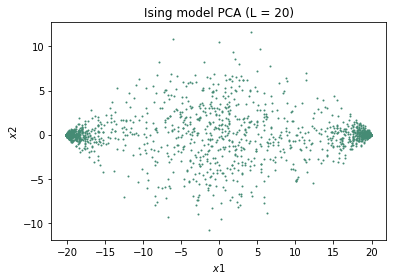

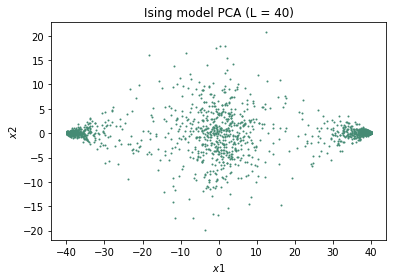

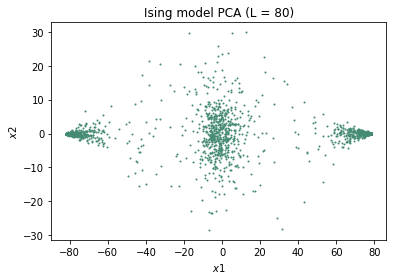

In [79]:
plot_pca_scatter(X_prime_20, sys_size = 20, columns = [0,1])
plot_pca_scatter(X_prime_40, sys_size = 40, columns = [0,1])
plot_pca_scatter(X_prime_80, sys_size = 80, columns = [0,1])

With larger $L$ we observe increasing clustering of the scattering of the PCA elements. We observe a split into three clusters.

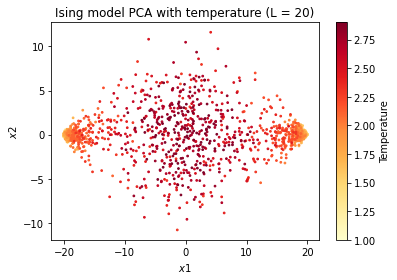

<Figure size 1080x432 with 0 Axes>

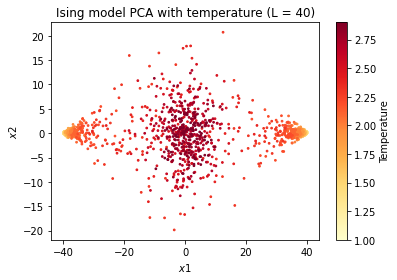

<Figure size 1080x432 with 0 Axes>

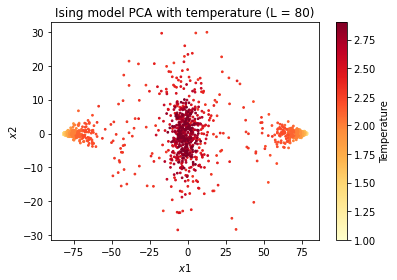

<Figure size 1080x432 with 0 Axes>

In [86]:
plot_pca_scatter_with_T(X_prime_20, temperatures = T_ising_20, sys_size = 20, columns = [0,1])
plot_pca_scatter_with_T(X_prime_40, temperatures = T_ising_40, sys_size = 40, columns = [0,1])
plot_pca_scatter_with_T(X_prime_80, temperatures = T_ising_80, sys_size = 80, columns = [0,1])

Scattered points around the origin correspond to high-temperature samples, while on the left and right of this centre scattering we find the low temperature points, corresponding to the two distinct ground states of the Ising model (symmetric and opposite polarisations). The sample points in between these two phases correspond to the critical temperature points, where we observe large distr